##**Question 1**

In [29]:
# Step 1: creating xor's truthtabel

import numpy as np
import pandas as pd

data = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Output': [0, 1, 1, 0]
}

# Create DataFrame
xor_df = pd.DataFrame(data)
print(xor_df)


   A  B  Output
0  0  0       0
1  0  1       1
2  1  0       1
3  1  1       0


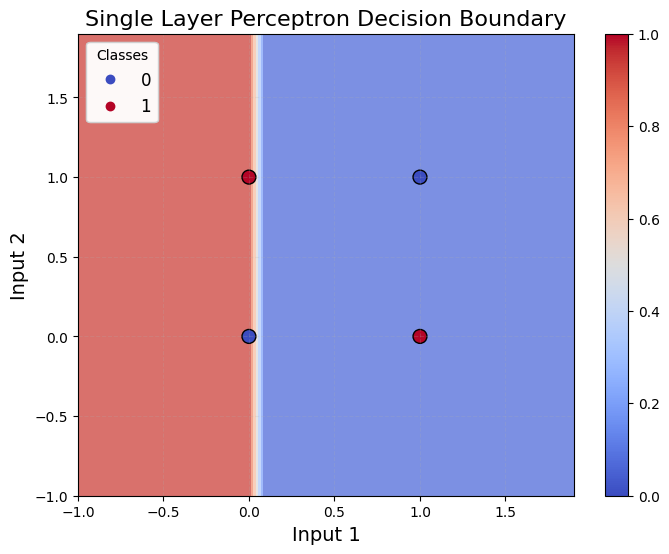

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([0, 1, 1, 0])  # Output for XOR

# Perceptron class (same as before)
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

# Instantiate and train the perceptron
slp = Perceptron(epochs=10)
slp.fit(X, y)

# Predictions
y_pred = slp.predict(X)

# Plot for SLP Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

    # Scatter plot for XOR data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolors='k', marker='o')

    # Customization
    plt.title("Single Layer Perceptron Decision Boundary", fontsize=16)
    plt.xlabel("Input 1", fontsize=14)
    plt.ylabel("Input 2", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Legend
    legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Classes", fontsize=12)
    plt.gca().add_artist(legend1)

    plt.colorbar(scatter)
    plt.show()

plot_decision_boundary(X, y, slp)


The model implemented did not provide the expected output, it also could not seperate the points in a single decision boundary


Epoch 0, Loss: 0.7045290470123291
Epoch 1000, Loss: 0.6930055618286133
Epoch 2000, Loss: 0.6927893161773682
Epoch 3000, Loss: 0.692137598991394
Epoch 4000, Loss: 0.6888260841369629
Epoch 5000, Loss: 0.6489629745483398
Epoch 6000, Loss: 0.3135531544685364
Epoch 7000, Loss: 0.10210156440734863
Epoch 8000, Loss: 0.05404992774128914
Epoch 9000, Loss: 0.03580869361758232


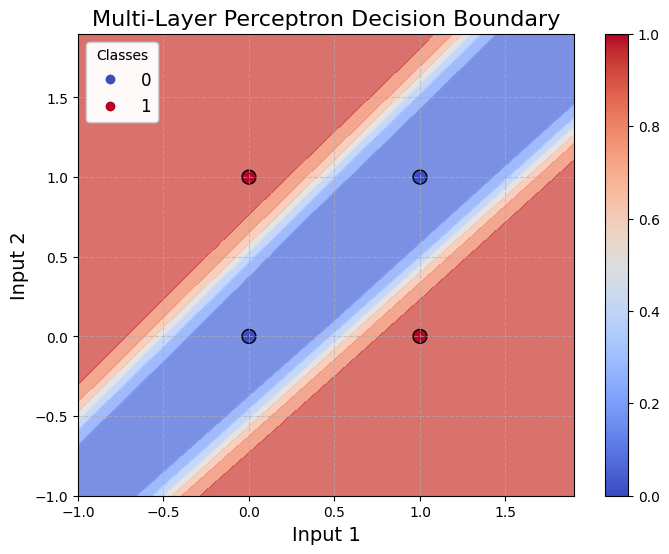

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert XOR data to PyTorch tensors
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y).reshape(-1, 1)

# Define MLP model (same as before)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 2)  # 2 input features, 2 hidden neurons
        self.output = nn.Linear(2, 1)  # 2 hidden neurons to 1 output

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

# Initialize model, loss function, and optimizer
mlp = MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(mlp.parameters(), lr=0.1)

# Train the MLP
epochs = 10000
for epoch in range(epochs):
    y_pred = mlp(X_torch)
    loss = criterion(y_pred, y_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Improved Plot for MLP Decision Boundary
def plot_decision_boundary_torch(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.detach().numpy().reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

    # Scatter plot for XOR data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolors='k', marker='o')

    # Customization
    plt.title("Multi-Layer Perceptron Decision Boundary", fontsize=16)
    plt.xlabel("Input 1", fontsize=14)
    plt.ylabel("Input 2", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Legend
    legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Classes", fontsize=12)
    plt.gca().add_artist(legend1)

    plt.colorbar(scatter)
    plt.show()

plot_decision_boundary_torch(X, y, mlp)


using mlp, we are able to seperate the points using 2 decision boundary


## **Question 2**

**1. Preprocessing**

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/nndl/Tweets.csv')

# Check the data
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [34]:
# Drop unnecessary columns and check for missing values
df = df[['text', 'airline_sentiment']].dropna()

# Convert sentiment to binary labels (positive = 1, negative = 0)
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['text']).toarray()

# the given Target variable
y = df['airline_sentiment'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Import Keras for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
def create_model(activation_function='sigmoid'):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy']) #this is for backpropogation using ADAM
    return model

# Create the model with Sigmoid activation for demonstration
model = create_model(activation_function='sigmoid')

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,033 (62.63 KB)

 Trainable params: 16,033 (62.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3674 - loss: 0.9105 - val_accuracy: 0.8432 - val_loss: 0.4250
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8422 - loss: 0.4151 - val_accuracy: 0.8432 - val_loss: 0.3887
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8391 - loss: 0.3878 - val_accuracy: 0.8443 - val_loss: 0.3639
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8386 - loss: 0.3636 - val_accuracy: 0.8555 - val_loss: 0.3351
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8553 - loss: 0.3295 - val_accuracy: 0.8706 - val_loss: 0.3053
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3054 - val_accuracy: 0.8887 - val_loss: 0.2793
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8851 - loss: 0.2729 - val_accuracy: 0.9003 - val_loss: 0.2596
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: 0.2484 - val_accuracy: 0.

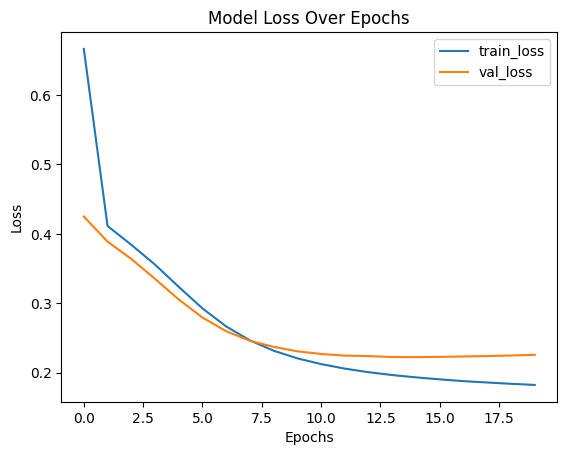

In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the loss over epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [37]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 91.56%


In [38]:
# Create and train model with ReLU
model_relu = create_model(activation_function='relu')
history_relu = model_relu.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Create and train model with Tanh
model_tanh = create_model(activation_function='tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8352 - loss: 0.4890 - val_accuracy: 0.8699 - val_loss: 0.3042
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.2820 - val_accuracy: 0.9098 - val_loss: 0.2395
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9102 - loss: 0.2244 - val_accuracy: 0.9167 - val_loss: 0.2255
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9204 - loss: 0.2043 - val_accuracy: 0.9173 - val_loss: 0.2232
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9274 - loss: 0.1920 - val_accuracy: 0.9167 - val_loss: 0.2243
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9314 - loss: 0.1791 - val_accuracy: 0.9156 - val_loss: 0.2269
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.1820 - val_accuracy: 0.9156 - val_loss: 0.2294
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9313 - loss: 0.1757 - val_accuracy: 0.

In [48]:
# Predict on the test set for ReLU
y_pred_relu = (model_relu.predict(X_test) > 0.5).astype(int)

# Calculate accuracy for ReLU
accuracy_relu = accuracy_score(y_test, y_pred_relu)
print(f'ReLU Activation Accuracy: {accuracy_relu * 100:.2f}%')

# Predict on the test set for Tanh
y_pred_tanh = (model_tanh.predict(X_test) > 0.5).astype(int)

# Calculate accuracy for Tanh
accuracy_tanh = accuracy_score(y_test, y_pred_tanh)
print(f'Tanh Activation Accuracy: {accuracy_tanh * 100:.2f}%')


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ReLU Activation Accuracy: 90.61%
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tanh Activation Accuracy: 91.02%


### Inference:

1. **ReLU Activation**: The model with ReLU activation has an accuracy of **90.61%**, meaning it performs well but has a small margin for improvement.

2. **Tanh Activation**: The model with Tanh activation has an accuracy of **91.02%**, indicating that Tanh performed a little better for this task.


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
